# Code alongs missing data

## Simulating missing values

In [10]:
import numpy as np 
import pandas as pd 

# in order to get comparable results 
np.random.seed(42)
n = 8 

random_matrix = np.random.randint(1,10, size=(n,n))
random_matrix



array([[7, 4, 8, 5, 7, 3, 7, 8],
       [5, 4, 8, 8, 3, 6, 5, 2],
       [8, 6, 2, 5, 1, 6, 9, 1],
       [3, 7, 4, 9, 3, 5, 3, 7],
       [5, 9, 7, 2, 4, 9, 2, 9],
       [5, 2, 4, 7, 8, 3, 1, 4],
       [2, 8, 4, 2, 6, 6, 4, 6],
       [2, 2, 4, 8, 7, 9, 8, 5]])

In [12]:
random_matrix.size

64

In [11]:
# sampling without replacement
index = np.random.choice(random_matrix.size, 10, replace=False)
index

array([21, 20, 36,  3,  5, 29, 12, 37, 41, 33])

In [13]:
# flattens our 8x8 2D-array into a 64 1D-array 
random_matrix.ravel()

array([7, 4, 8, 5, 7, 3, 7, 8, 5, 4, 8, 8, 3, 6, 5, 2, 8, 6, 2, 5, 1, 6,
       9, 1, 3, 7, 4, 9, 3, 5, 3, 7, 5, 9, 7, 2, 4, 9, 2, 9, 5, 2, 4, 7,
       8, 3, 1, 4, 2, 8, 4, 2, 6, 6, 4, 6, 2, 2, 4, 8, 7, 9, 8, 5])

In [17]:
# need to convert our random_matrix into floats 
# because can't assign None to int as np.nan is float
random_matrix = random_matrix*1.0
random_matrix.ravel()[index] = None
random_matrix

array([[ 7.,  4.,  8., nan,  7., nan,  7.,  8.],
       [ 5.,  4.,  8.,  8., nan,  6.,  5.,  2.],
       [ 8.,  6.,  2.,  5., nan, nan,  9.,  1.],
       [ 3.,  7.,  4.,  9.,  3., nan,  3.,  7.],
       [ 5., nan,  7.,  2., nan, nan,  2.,  9.],
       [ 5., nan,  4.,  7.,  8.,  3.,  1.,  4.],
       [ 2.,  8.,  4.,  2.,  6.,  6.,  4.,  6.],
       [ 2.,  2.,  4.,  8.,  7.,  9.,  8.,  5.]])

In [23]:
scores = pd.DataFrame(
    random_matrix,
    columns=[f"Round {i}" for i in range(1, 9)],
    index=[f"Player {i}" for i in range(1, 9)],
)

scores

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,7.0,4.0,8.0,NaN,7.0,NaN,7.0,8.0
Player 2,5.0,4.0,8.0,8.0,NaN,6.0,5.0,2.0
Player 3,8.0,6.0,2.0,5.0,NaN,NaN,9.0,1.0
Player 4,3.0,7.0,4.0,9.0,3.0,NaN,3.0,7.0
Player 5,5.0,NaN,7.0,2.0,NaN,NaN,2.0,9.0
Player 6,5.0,NaN,4.0,7.0,8.0,3.0,1.0,4.0
Player 7,2.0,8.0,4.0,2.0,6.0,6.0,4.0,6.0
Player 8,2.0,2.0,4.0,8.0,7.0,9.0,8.0,5.0


## Handle missing values

In [24]:
scores.isnull()

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,False,False,False,True,False,True,False,False
Player 2,False,False,False,False,True,False,False,False
Player 3,False,False,False,False,True,True,False,False
Player 4,False,False,False,False,False,True,False,False
Player 5,False,True,False,False,True,True,False,False
Player 6,False,True,False,False,False,False,False,False
Player 7,False,False,False,False,False,False,False,False
Player 8,False,False,False,False,False,False,False,False


In [25]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, Player 1 to Player 8
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Round 1  8 non-null      float64
 1   Round 2  6 non-null      float64
 2   Round 3  8 non-null      float64
 3   Round 4  7 non-null      float64
 4   Round 5  5 non-null      float64
 5   Round 6  4 non-null      float64
 6   Round 7  8 non-null      float64
 7   Round 8  8 non-null      float64
dtypes: float64(8)
memory usage: 576.0+ bytes


In [27]:
scores

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,7.0,4.0,8.0,NaN,7.0,NaN,7.0,8.0
Player 2,5.0,4.0,8.0,8.0,NaN,6.0,5.0,2.0
Player 3,8.0,6.0,2.0,5.0,NaN,NaN,9.0,1.0
Player 4,3.0,7.0,4.0,9.0,3.0,NaN,3.0,7.0
Player 5,5.0,NaN,7.0,2.0,NaN,NaN,2.0,9.0
Player 6,5.0,NaN,4.0,7.0,8.0,3.0,1.0,4.0
Player 7,2.0,8.0,4.0,2.0,6.0,6.0,4.0,6.0
Player 8,2.0,2.0,4.0,8.0,7.0,9.0,8.0,5.0


In [26]:
# all rows that contains at least one nan will be removed
scores.dropna()

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 7,2.0,8.0,4.0,2.0,6.0,6.0,4.0,6.0
Player 8,2.0,2.0,4.0,8.0,7.0,9.0,8.0,5.0


In [28]:
scores.dropna(axis="columns")

,Round 1,Round 3,Round 7,Round 8
Player 1,7.0,8.0,7.0,8.0
Player 2,5.0,8.0,5.0,2.0
Player 3,8.0,2.0,9.0,1.0
Player 4,3.0,4.0,3.0,7.0
Player 5,5.0,7.0,2.0,9.0
Player 6,5.0,4.0,1.0,4.0
Player 7,2.0,4.0,4.0,6.0
Player 8,2.0,4.0,8.0,5.0


### Which strategy to choose? 

Say that a gaming expert (domain expert) says, if you have missing value, then your score for that round will be 0.

In [30]:
scores = scores.fillna(0)
scores

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,7.0,4.0,8.0,0.0,7.0,0.0,7.0,8.0
Player 2,5.0,4.0,8.0,8.0,0.0,6.0,5.0,2.0
Player 3,8.0,6.0,2.0,5.0,0.0,0.0,9.0,1.0
Player 4,3.0,7.0,4.0,9.0,3.0,0.0,3.0,7.0
Player 5,5.0,0.0,7.0,2.0,0.0,0.0,2.0,9.0
Player 6,5.0,0.0,4.0,7.0,8.0,3.0,1.0,4.0
Player 7,2.0,8.0,4.0,2.0,6.0,6.0,4.0,6.0
Player 8,2.0,2.0,4.0,8.0,7.0,9.0,8.0,5.0


In [33]:
scores.describe().T

,count,mean,std,min,25%,50%,75%,max
Round 1,8.0,4.625,2.199838,2.0,2.75,5.0,5.50,8.0
Round 2,8.0,3.875,3.044316,0.0,1.50,4.0,6.25,8.0
Round 3,8.0,5.125,2.232071,2.0,4.00,4.0,7.25,8.0
Round 4,8.0,5.125,3.399054,0.0,2.00,6.0,8.00,9.0
Round 5,8.0,3.875,3.522884,0.0,0.00,4.5,7.00,8.0
Round 6,8.0,3.000,3.585686,0.0,0.00,1.5,6.00,9.0
Round 7,8.0,4.875,2.900123,1.0,2.75,4.5,7.25,9.0
Round 8,8.0,5.250,2.815772,1.0,3.50,5.5,7.25,9.0


## Missing data - strategy

Strategies depend on 
- dataset size
  - small dataset - be more careful with data
  - large dataset - more easier to remove NaNs
- may need to impute missing values
- percentage of missing values
- valuable info
- domain expertise - how to fill the nulls
  - e.g. scores - fill with 0
  - e.g. could be filled with mean value of a category
  - e.g. missing values between two points -> interpolate
- data visualisation

In [36]:
import seaborn as sns 

titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [37]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [39]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### Focus on age column

<Axes: xlabel='age', ylabel='Count'>

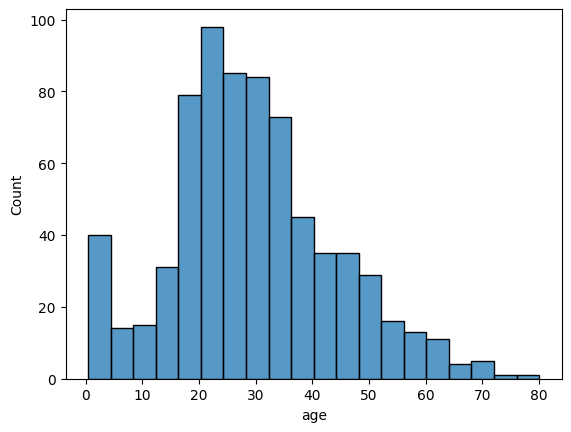

In [40]:
sns.histplot(data=titanic, x="age")

<Axes: xlabel='age', ylabel='Count'>

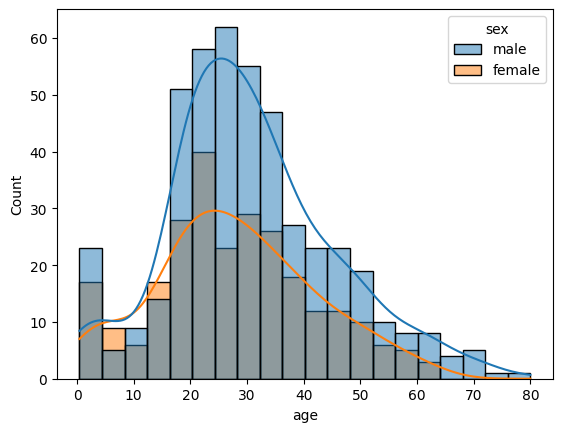

In [43]:
sns.histplot(data=titanic, x="age", hue="sex", kde=True)

### Example strategy

We have talked to a historian that advices us to take the median age of each group (male, female) to impute the missing values.

In [50]:
median_male_age = titanic[titanic["sex"] == "male"]["age"].median()
median_female_age = titanic[titanic["sex"] == "female"]["age"].median()


median_male_age, median_female_age

(29.0, 27.0)

In [53]:
titanic.loc[titanic["sex"] == "male", "age"] = titanic.loc[
    titanic["sex"] == "male", "age"
].fillna(median_male_age)

In [54]:
titanic.loc[titanic["age"] == 29, "sex"].value_counts()

sex
male      137
female      7
Name: count, dtype: int64

In [56]:
titanic.loc[titanic["sex"] == "female", "age"] = titanic.loc[
    titanic["sex"] == "female", "age"
].fillna(median_female_age)

titanic.loc[titanic["age"] == 27, "sex"].value_counts()

sex
female    59
male      12
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

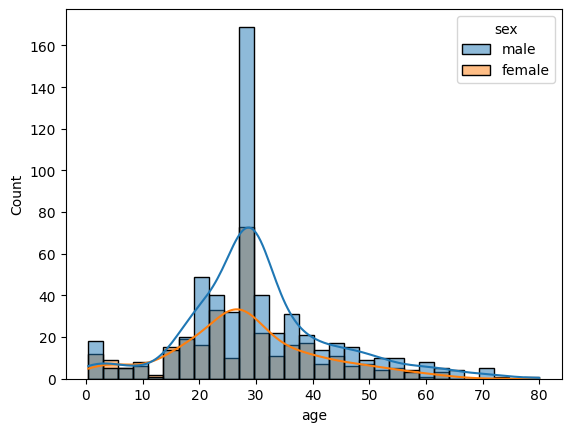

In [57]:
sns.histplot(data=titanic, x="age", kde=True, hue="sex")

## Aggregations and groupby

In [58]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [62]:
survivors = titanic.groupby("sex")[["survived", "age"]].mean()
survivors

,survived,age
sex,,
female,0.742038,27.761146
male,0.188908,30.355581


In [64]:
titanic.groupby("class")[["age", "fare"]].max()

/var/folders/3s/7mxc35_16j71s8tnrxvhfg4m0000gn/T/ipykernel_3540/55204569.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby("class")[["age", "fare"]].max()


,age,fare
class,,
First,80.0,512.3292
Second,70.0,73.5000
Third,74.0,69.5500


[Text(0, 0.5, 'Count'), Text(0.5, 1.0, 'Survival count in titanic vs class')]

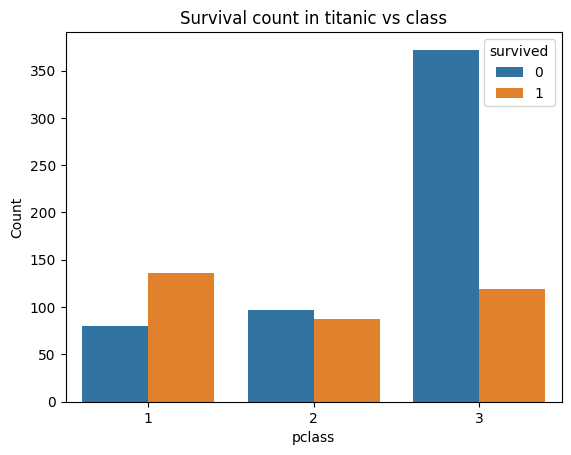

In [70]:
survived_class = titanic.groupby(["survived", "pclass"]).count().reset_index()
ax = sns.barplot(data=survived_class, x="pclass", y="sex", hue="survived")
ax.set(ylabel="Count", title="Survival count in titanic vs class")